In [3]:
#Load necessary packages for the analysis 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary

In [4]:
#Load data into the supply chain dataframe
supply_chain_df=pd.read_csv('C:/Users/gouth/Desktop/Semester 4/Machine Learning 2/Assignment 1/Input/DataCoSupplyChainDataset.csv',encoding='latin-1')

In [5]:
supply_chain_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
#Display all columns of the supply chain dataset
column_names = supply_chain_df.columns
for i in range(0,len(column_names)):
    print(column_names[i])

Type
Days for shipping (real)
Days for shipment (scheduled)
Benefit per order
Sales per customer
Delivery Status
Late_delivery_risk
Category Id
Category Name
Customer City
Customer Country
Customer Email
Customer Fname
Customer Id
Customer Lname
Customer Password
Customer Segment
Customer State
Customer Street
Customer Zipcode
Department Id
Department Name
Latitude
Longitude
Market
Order City
Order Country
Order Customer Id
order date (DateOrders)
Order Id
Order Item Cardprod Id
Order Item Discount
Order Item Discount Rate
Order Item Id
Order Item Product Price
Order Item Profit Ratio
Order Item Quantity
Sales
Order Item Total
Order Profit Per Order
Order Region
Order State
Order Status
Order Zipcode
Product Card Id
Product Category Id
Product Description
Product Image
Product Name
Product Price
Product Status
shipping date (DateOrders)
Shipping Mode


In [7]:
#Create a subset of supply chain dataframe with most relevant variables for the ease of analysis
supply_chain_variables = ['Order Id','Type','Days for shipping (real)','Days for shipment (scheduled)','Benefit per order','Late_delivery_risk','order date (DateOrders)','Order Item Discount','Order Item Quantity','Sales','Order Status','Product Status','shipping date (DateOrders)','Shipping Mode']
supply_chain_sub = supply_chain_df[supply_chain_variables]

In [8]:
#Preview records of the subset of supply chain dataframe 
supply_chain_sub.head()

,Order Id,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Late_delivery_risk,order date (DateOrders),Order Item Discount,Order Item Quantity,Sales,Order Status,Product Status,shipping date (DateOrders),Shipping Mode
0,77202,DEBIT,3,4,91.250000,0,1/31/2018 22:56,13.110000,1,327.75,COMPLETE,0,2/3/2018 22:56,Standard Class
1,75939,TRANSFER,5,4,-249.089996,1,1/13/2018 12:27,16.389999,1,327.75,PENDING,0,1/18/2018 12:27,Standard Class
2,75938,CASH,4,4,-247.779999,0,1/13/2018 12:06,18.030001,1,327.75,CLOSED,0,1/17/2018 12:06,Standard Class
3,75937,DEBIT,3,4,22.860001,0,1/13/2018 11:45,22.940001,1,327.75,COMPLETE,0,1/16/2018 11:45,Standard Class
4,75936,PAYMENT,2,4,134.210007,0,1/13/2018 11:24,29.500000,1,327.75,PENDING_PAYMENT,0,1/15/2018 11:24,Standard Class


The order status of importance for our analysis are: Complete and Closed as the project is focused on analysing the orders that has been completed and determining the late delivery risk based on the historic data of the completed orders.

In [9]:
#Filter and select dataframe based on relevant order status
supply_chain_df2 = supply_chain_sub[(supply_chain_sub['Order Status']=='COMPLETE') |(supply_chain_sub['Order Status']=='CLOSED')]

In [10]:
supply_chain_df2.head()

,Order Id,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Late_delivery_risk,order date (DateOrders),Order Item Discount,Order Item Quantity,Sales,Order Status,Product Status,shipping date (DateOrders),Shipping Mode
0,77202,DEBIT,3,4,91.250000,0,1/31/2018 22:56,13.110000,1,327.75,COMPLETE,0,2/3/2018 22:56,Standard Class
2,75938,CASH,4,4,-247.779999,0,1/13/2018 12:06,18.030001,1,327.75,CLOSED,0,1/17/2018 12:06,Standard Class
3,75937,DEBIT,3,4,22.860001,0,1/13/2018 11:45,22.940001,1,327.75,COMPLETE,0,1/16/2018 11:45,Standard Class
6,75934,DEBIT,2,1,95.180000,1,1/13/2018 10:42,39.330002,1,327.75,COMPLETE,0,1/15/2018 10:42,First Class
8,75932,CASH,3,2,133.720001,1,1/13/2018 10:00,49.160000,1,327.75,CLOSED,0,1/16/2018 10:00,Second Class


In [11]:
#Select and display the duplicate rows of the dataframe
duplicate_df = supply_chain_df2[supply_chain_df2.duplicated(keep=False)]
print(duplicate_df)

Empty DataFrame
Columns: [Order Id, Type, Days for shipping (real), Days for shipment (scheduled), Benefit per order, Late_delivery_risk, order date (DateOrders), Order Item Discount, Order Item Quantity, Sales, Order Status, Product Status, shipping date (DateOrders), Shipping Mode]
Index: []


In [12]:
#Introduce a categorical variable - Shedule_Mismatch.
# 0 represents days of shipment (scheduled) >= days of shipment (real) 
# 1 represents days of shipment (scheduled) < days of shipment (real) 

supply_chain_df2['Shedule_Mismatch'] = supply_chain_df2.apply(lambda row: '1' if row['Days for shipping (real)'] > row['Days for shipment (scheduled)'] else '0', axis=1)
 

C:\Users\gouth\AppData\Local\Temp\ipykernel_22792\3000357914.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_chain_df2['Shedule_Mismatch'] = supply_chain_df2.apply(lambda row: '1' if row['Days for shipping (real)'] > row['Days for shipment (scheduled)'] else '0', axis=1)


In [13]:
supply_chain_df2.head()

,Order Id,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Late_delivery_risk,order date (DateOrders),Order Item Discount,Order Item Quantity,Sales,Order Status,Product Status,shipping date (DateOrders),Shipping Mode,Shedule_Mismatch
0,77202,DEBIT,3,4,91.250000,0,1/31/2018 22:56,13.110000,1,327.75,COMPLETE,0,2/3/2018 22:56,Standard Class,0
2,75938,CASH,4,4,-247.779999,0,1/13/2018 12:06,18.030001,1,327.75,CLOSED,0,1/17/2018 12:06,Standard Class,0
3,75937,DEBIT,3,4,22.860001,0,1/13/2018 11:45,22.940001,1,327.75,COMPLETE,0,1/16/2018 11:45,Standard Class,0
6,75934,DEBIT,2,1,95.180000,1,1/13/2018 10:42,39.330002,1,327.75,COMPLETE,0,1/15/2018 10:42,First Class,1
8,75932,CASH,3,2,133.720001,1,1/13/2018 10:00,49.160000,1,327.75,CLOSED,0,1/16/2018 10:00,Second Class,1


In [14]:
#Convert "order date (DateOrders)" and "shipping date (DateOrders)" column data into date variables
supply_chain_df2['order date (DateOrders)'] = pd.to_datetime(supply_chain_df2['order date (DateOrders)'])  
supply_chain_df2['shipping date (DateOrders)'] = pd.to_datetime(supply_chain_df2['shipping date (DateOrders)'])

#Introduce a new variable Order_to_Shipping_duration which calculates the duration between order date and shipping date
supply_chain_df2['Order_to_Shipping_duration'] = supply_chain_df2.apply(lambda row: (row['shipping date (DateOrders)'] - row['order date (DateOrders)']).days, axis=1)

C:\Users\gouth\AppData\Local\Temp\ipykernel_22792\598312051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_chain_df2['order date (DateOrders)'] = pd.to_datetime(supply_chain_df2['order date (DateOrders)'])
C:\Users\gouth\AppData\Local\Temp\ipykernel_22792\598312051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_chain_df2['shipping date (DateOrders)'] = pd.to_datetime(supply_chain_df2['shipping date (DateOrders)'])
C:\Users\gouth\AppData\Local\Temp\ipykernel_22792\598312051.py:6: Sett

In [15]:
supply_chain_df2.head()

,Order Id,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Late_delivery_risk,order date (DateOrders),Order Item Discount,Order Item Quantity,Sales,Order Status,Product Status,shipping date (DateOrders),Shipping Mode,Shedule_Mismatch,Order_to_Shipping_duration
0,77202,DEBIT,3,4,91.250000,0,2018-01-31 22:56:00,13.110000,1,327.75,COMPLETE,0,2018-02-03 22:56:00,Standard Class,0,3
2,75938,CASH,4,4,-247.779999,0,2018-01-13 12:06:00,18.030001,1,327.75,CLOSED,0,2018-01-17 12:06:00,Standard Class,0,4
3,75937,DEBIT,3,4,22.860001,0,2018-01-13 11:45:00,22.940001,1,327.75,COMPLETE,0,2018-01-16 11:45:00,Standard Class,0,3
6,75934,DEBIT,2,1,95.180000,1,2018-01-13 10:42:00,39.330002,1,327.75,COMPLETE,0,2018-01-15 10:42:00,First Class,1,2
8,75932,CASH,3,2,133.720001,1,2018-01-13 10:00:00,49.160000,1,327.75,CLOSED,0,2018-01-16 10:00:00,Second Class,1,3


# DATA PRE-PROCESSING

### HANDLING MISSING VALUE

In [16]:
#Count the number of null values in different columns of DataFrame
null_count = supply_chain_df2.isna().sum()
print(null_count)

Order Id                         0
Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Late_delivery_risk               0
order date (DateOrders)          0
Order Item Discount              0
Order Item Quantity              0
Sales                            0
Order Status                     0
Product Status                   0
shipping date (DateOrders)       0
Shipping Mode                    0
Shedule_Mismatch                 0
Order_to_Shipping_duration       0
dtype: int64


### CATEGORICAL VARIABLES

In [17]:
supply_chain_cat_variables = ['Type','Late_delivery_risk','Order Status','Product Status','Shipping Mode']

for s in supply_chain_cat_variables :
        print("Categorical variable:",s)
        print("Distinct values of the categorical value:",supply_chain_df2[s].unique())
        print("\n")

Categorical variable: Type
Distinct values of the categorical value: ['DEBIT' 'CASH']


Categorical variable: Late_delivery_risk
Distinct values of the categorical value: [0 1]


Categorical variable: Order Status
Distinct values of the categorical value: ['COMPLETE' 'CLOSED']


Categorical variable: Product Status
Distinct values of the categorical value: [0]


Categorical variable: Shipping Mode
Distinct values of the categorical value: ['Standard Class' 'First Class' 'Second Class' 'Same Day']




In [18]:
#Drop the Product status column since it has only one type of categorical value hence it is low variation data
supply_chain_df2.drop(columns=['Product Status'], inplace=True)

C:\Users\gouth\AppData\Local\Temp\ipykernel_22792\1521950742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_chain_df2.drop(columns=['Product Status'], inplace=True)


In [19]:
supply_chain_df2.head()

,Order Id,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Late_delivery_risk,order date (DateOrders),Order Item Discount,Order Item Quantity,Sales,Order Status,shipping date (DateOrders),Shipping Mode,Shedule_Mismatch,Order_to_Shipping_duration
0,77202,DEBIT,3,4,91.250000,0,2018-01-31 22:56:00,13.110000,1,327.75,COMPLETE,2018-02-03 22:56:00,Standard Class,0,3
2,75938,CASH,4,4,-247.779999,0,2018-01-13 12:06:00,18.030001,1,327.75,CLOSED,2018-01-17 12:06:00,Standard Class,0,4
3,75937,DEBIT,3,4,22.860001,0,2018-01-13 11:45:00,22.940001,1,327.75,COMPLETE,2018-01-16 11:45:00,Standard Class,0,3
6,75934,DEBIT,2,1,95.180000,1,2018-01-13 10:42:00,39.330002,1,327.75,COMPLETE,2018-01-15 10:42:00,First Class,1,2
8,75932,CASH,3,2,133.720001,1,2018-01-13 10:00:00,49.160000,1,327.75,CLOSED,2018-01-16 10:00:00,Second Class,1,3


In [20]:
#Summary Statistics of the subset of supply chain dataset
supply_chain_num_var = ['Days for shipping (real)','Days for shipment (scheduled)','Benefit per order','Order Item Discount','Order Item Quantity','Sales','Order_to_Shipping_duration']
supply_chain_df2[supply_chain_num_var].describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Order Item Discount,Order Item Quantity,Sales,Order_to_Shipping_duration
count,79107.000000,79107.000000,79107.000000,79107.000000,79107.000000,79107.000000,79107.000000
mean,3.483674,2.924975,22.497590,20.746841,2.124742,203.748583,3.457532
std,1.617102,1.376736,104.320758,21.976412,1.452459,134.209031,1.664432
min,0.000000,0.000000,-4274.979980,0.000000,1.000000,9.990000,0.000000
25%,2.000000,2.000000,7.200000,5.400000,1.000000,119.980003,2.000000
50%,3.000000,4.000000,31.570000,14.000000,1.000000,199.919998,3.000000
75%,5.000000,4.000000,64.889999,30.000000,3.000000,299.950012,5.000000
max,6.000000,4.000000,911.799988,500.000000,5.000000,1999.989990,6.000000


In [21]:
# Mean of the columns "Days for shipping (real)" and "Days for shipment (scheduled)"
mean_1 = supply_chain_df2[supply_chain_df2['Days for shipping (real)'] != 0]['Days for shipping (real)'].mean()
mean_2 = supply_chain_df2[supply_chain_df2['Days for shipment (scheduled)'] != 0]['Days for shipment (scheduled)'].mean()

# Impute mean for zero values
supply_chain_df2['Days for shipping (real)'] = supply_chain_df2['Days for shipping (real)'].replace(0, mean_1)
supply_chain_df2['Days for shipment (scheduled)'] = supply_chain_df2['Days for shipment (scheduled)'].replace(0, mean_2)

#Recompute the value of variable Order_to_Shipping_duration
supply_chain_df2['Order_to_Shipping_duration'] = supply_chain_df2.apply(lambda row: (row['shipping date (DateOrders)'] - row['order date (DateOrders)']).days, axis=1)


C:\Users\gouth\AppData\Local\Temp\ipykernel_22792\2459481240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_chain_df2['Days for shipping (real)'] = supply_chain_df2['Days for shipping (real)'].replace(0, mean_1)
C:\Users\gouth\AppData\Local\Temp\ipykernel_22792\2459481240.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_chain_df2['Days for shipment (scheduled)'] = supply_chain_df2['Days for shipment (scheduled)'].replace(0, mean_2)
C:\Users\gouth\AppData\Local\Temp\ipykernel_22792\2459

In [22]:
#Summary Statistics of the subset of supply chain dataset
supply_chain_df2[supply_chain_num_var].describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Order Item Discount,Order Item Quantity,Sales,Order_to_Shipping_duration
count,79107.000000,79107.000000,79107.000000,79107.000000,79107.000000,79107.000000,79107.000000
mean,3.584260,3.092610,22.497590,20.746841,2.124742,203.748583,3.457532
std,1.504861,1.185356,104.320758,21.976412,1.452459,134.209031,1.664432
min,1.000000,1.000000,-4274.979980,0.000000,1.000000,9.990000,0.000000
25%,2.000000,2.000000,7.200000,5.400000,1.000000,119.980003,2.000000
50%,3.000000,4.000000,31.570000,14.000000,1.000000,199.919998,3.000000
75%,5.000000,4.000000,64.889999,30.000000,3.000000,299.950012,5.000000
max,6.000000,4.000000,911.799988,500.000000,5.000000,1999.989990,6.000000


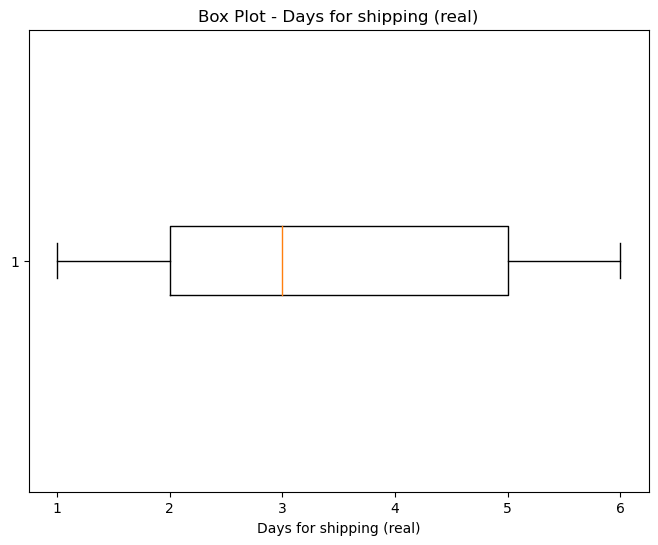

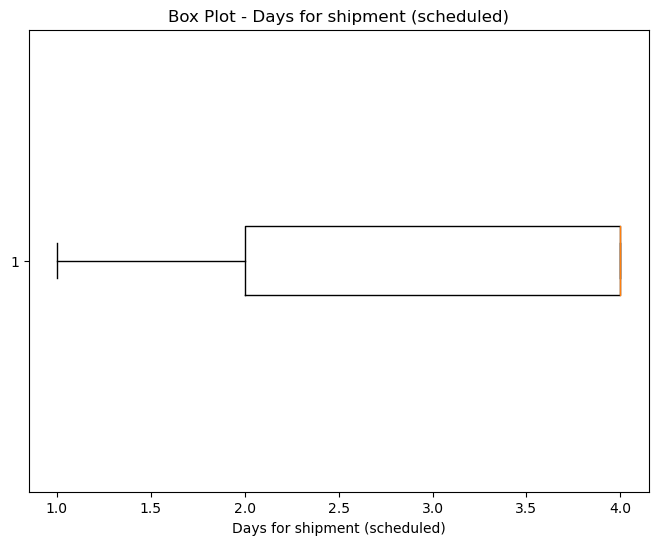

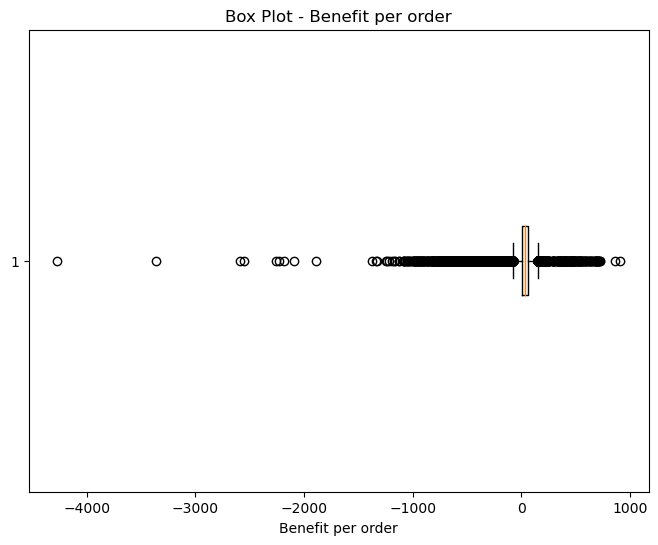

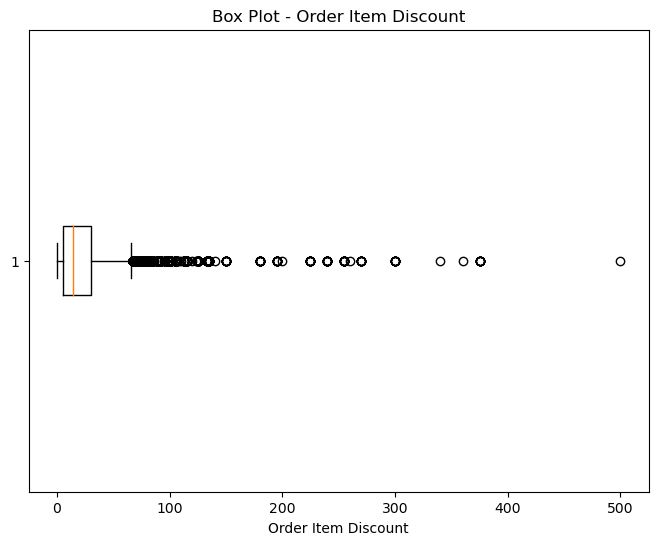

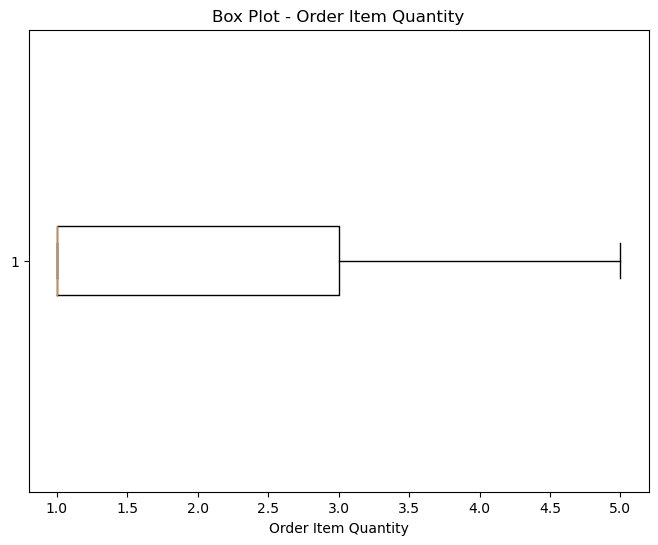

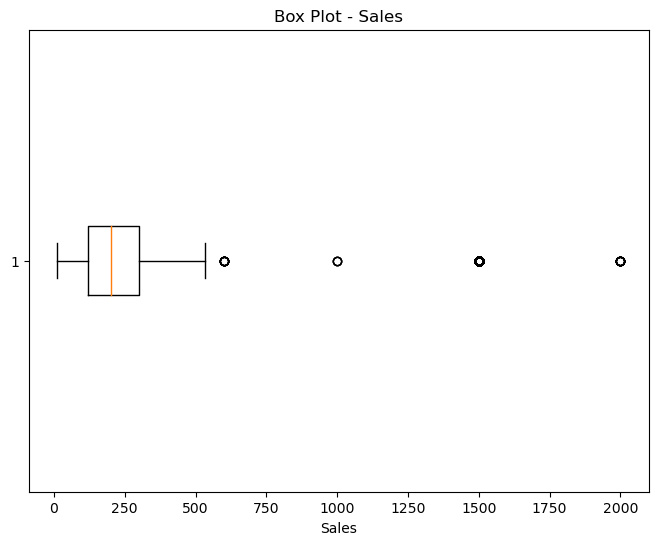

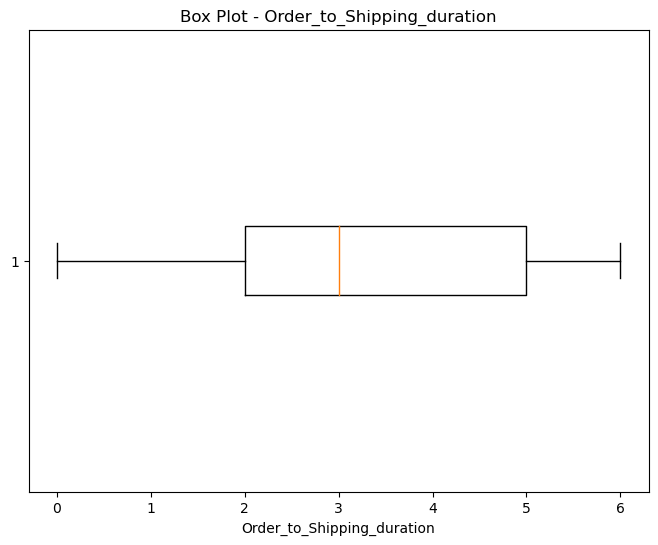

In [23]:
#Plot box plots for all relevant numerical attributes
if not os.path.exists("outlier_plots"):
     os.makedirs("outlier_plots")

for column in supply_chain_df2[supply_chain_num_var]:
            plt.figure(figsize=(8, 6))
            plt.boxplot(supply_chain_df2[column], vert=False)
            plt.title(f"Box Plot - {column}")
            plt.xlabel(column)
            plt.savefig(f"outlier_plots/{column}_boxplot.png")
            plt.show()

In [24]:
#Function that returns the list of outliers based on Inter Quartile Range
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

supply_chain_outlier_attr = ['Benefit per order','Order Item Discount','Sales']

for m in supply_chain_df2[supply_chain_outlier_attr].columns:
    outlier_list = detect_outliers_iqr(supply_chain_df2[m])
    #Remove records based on the outlier values of build_year
    for p in range(0,len(outlier_list)):
        supply_chain_df2[m] = supply_chain_df2[m].replace({outlier_list[p]:supply_chain_df2[m].mean()})
        

C:\Users\gouth\AppData\Local\Temp\ipykernel_22792\536612003.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_chain_df2[m] = supply_chain_df2[m].replace({outlier_list[p]:supply_chain_df2[m].mean()})


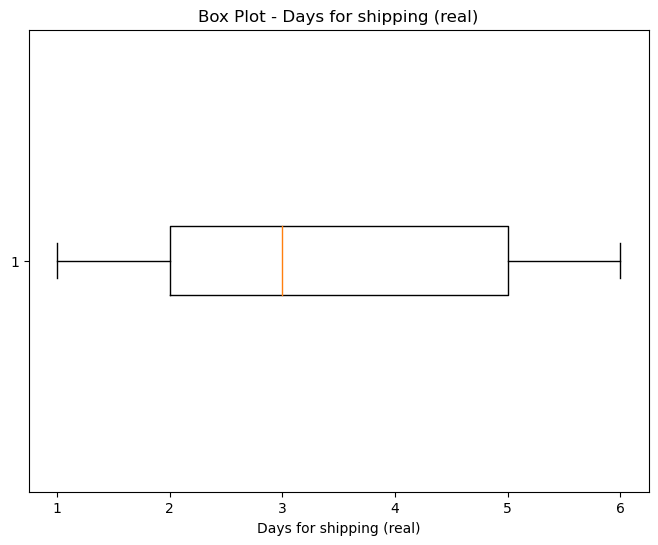

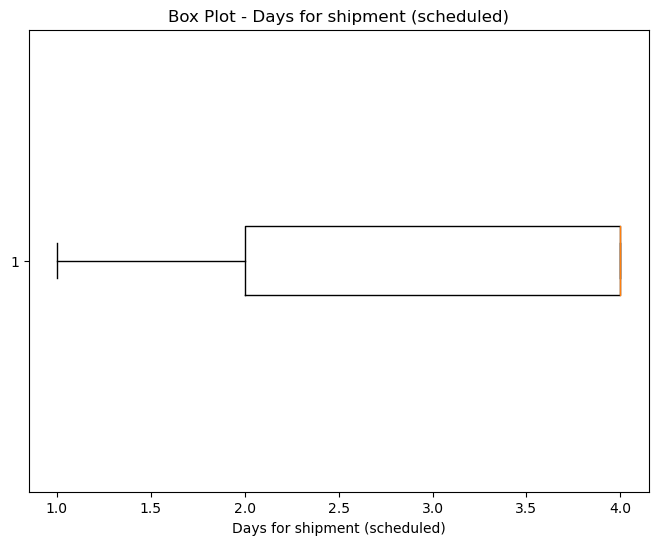

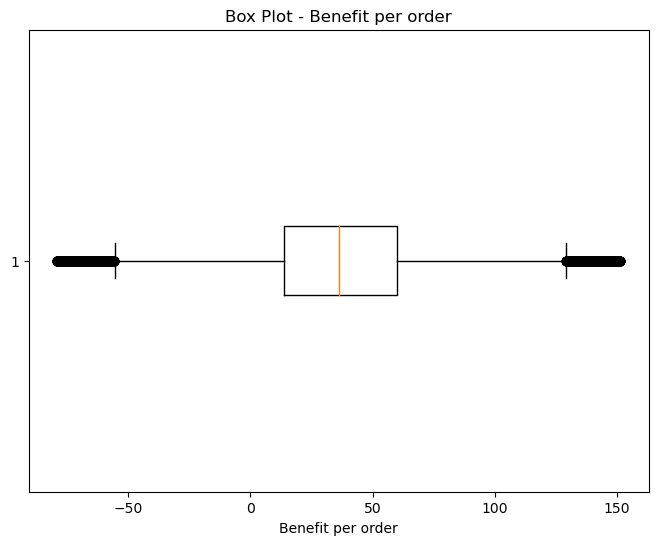

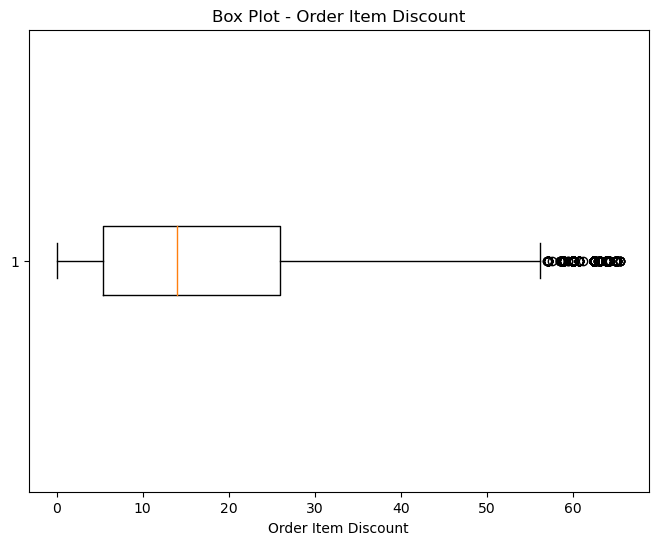

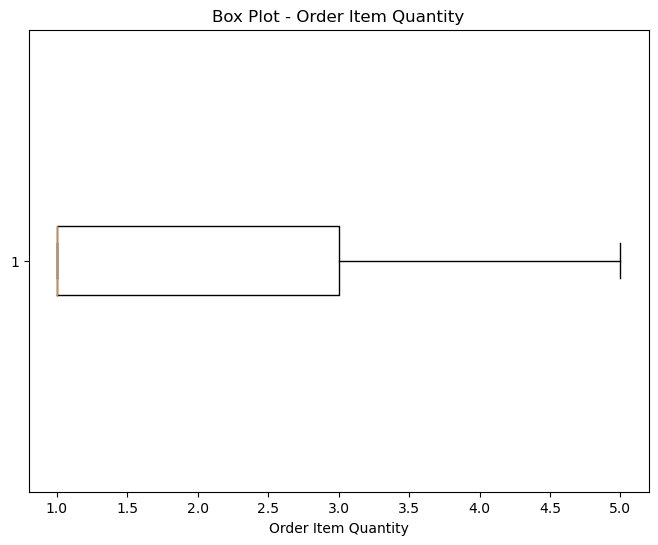

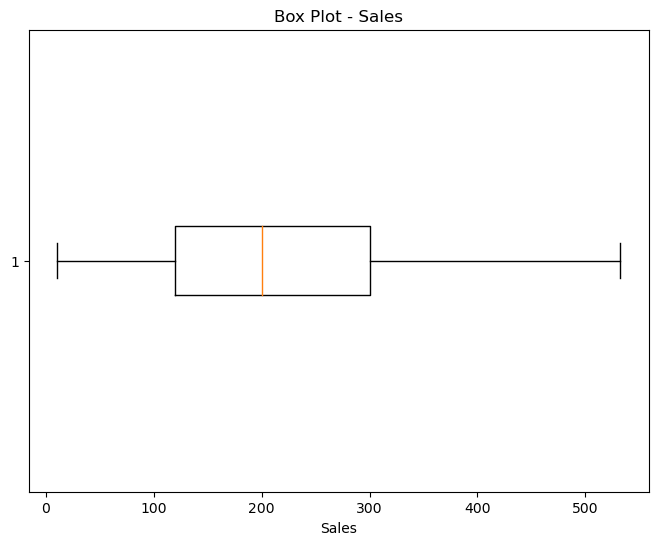

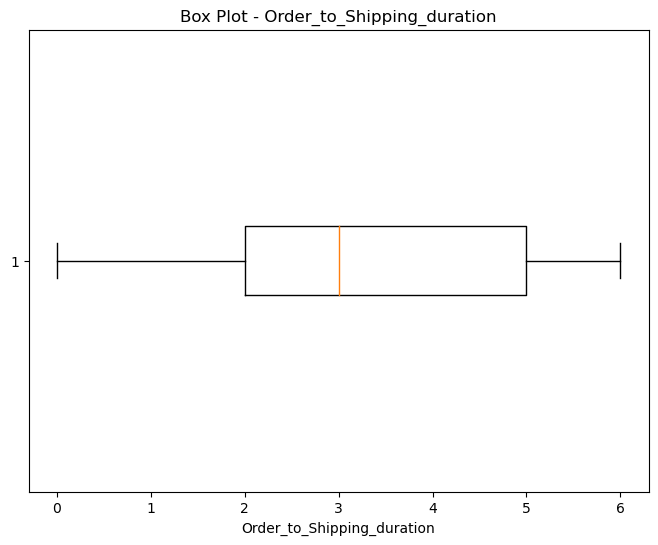

In [25]:
#Plot box plots for all relevant numerical attributes
if not os.path.exists("outlier_plots"):
     os.makedirs("outlier_plots")

for column in supply_chain_df2[supply_chain_num_var]:
            plt.figure(figsize=(8, 6))
            plt.boxplot(supply_chain_df2[column], vert=False)
            plt.title(f"Box Plot - {column}")
            plt.xlabel(column)
            plt.savefig(f"outlier_plots/{column}_boxplot.png")
            plt.show()

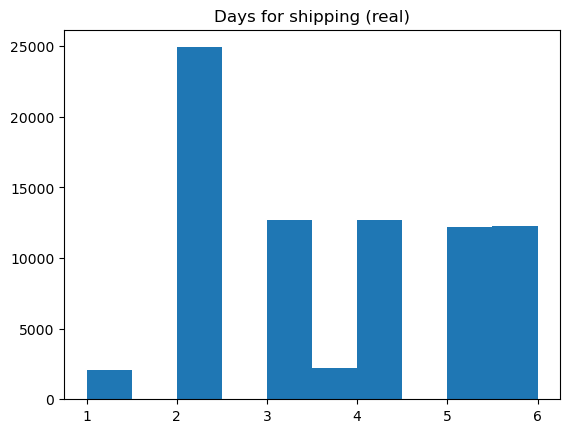

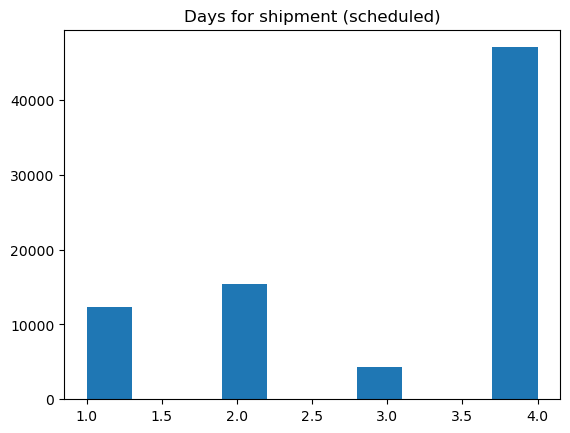

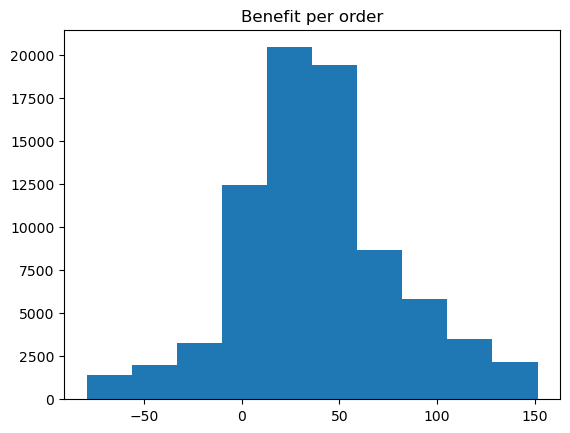

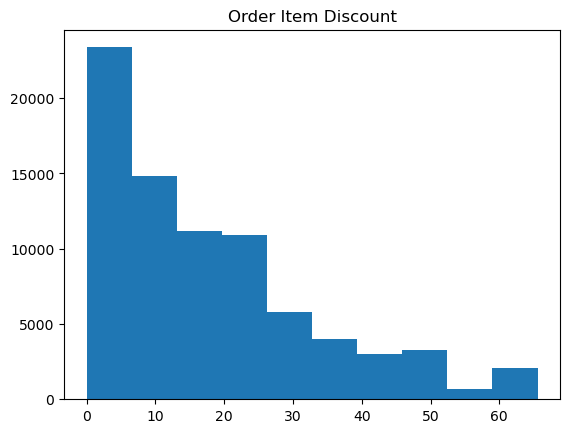

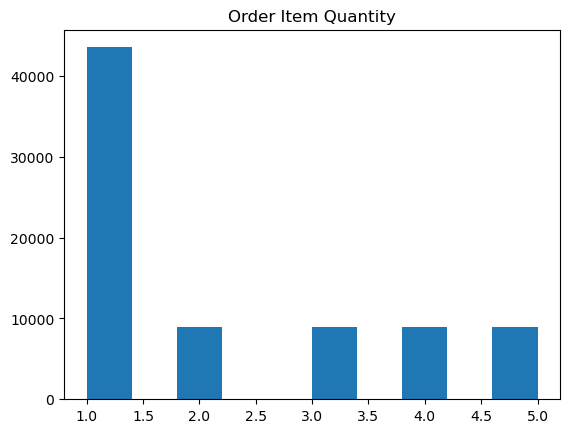

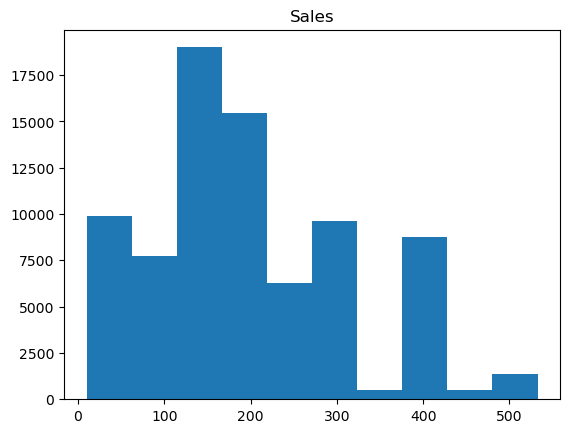

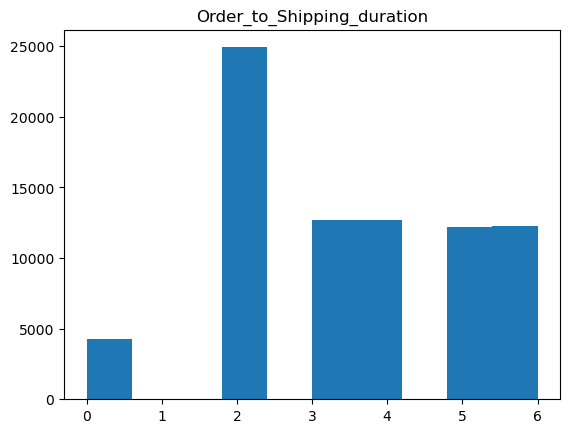

In [26]:
# Plot histogram to identify the distribution of values 
for i in supply_chain_df2[supply_chain_num_var].columns: 
        x =supply_chain_df2[i]
        plt.hist(x, bins=10)
        plt.title(i)
        plt.show()

In [27]:
supply_chain_df3 = supply_chain_df2[['Type','Benefit per order','Late_delivery_risk','Order Item Discount','Order Item Quantity','Sales','Shipping Mode', 'Shedule_Mismatch','Order_to_Shipping_duration']]

#Define the Type and shipping mode as categorical data
supply_chain_df3['Type']= supply_chain_df3['Type'].astype('category')
supply_chain_df3['Shipping Mode']= supply_chain_df3['Shipping Mode'].astype('category')

#Encoding the categorical variables 
supply_chain_df3 = pd.get_dummies(supply_chain_df3, columns=['Type','Shipping Mode'])


C:\Users\gouth\AppData\Local\Temp\ipykernel_22792\314953638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_chain_df3['Type']= supply_chain_df3['Type'].astype('category')
C:\Users\gouth\AppData\Local\Temp\ipykernel_22792\314953638.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_chain_df3['Shipping Mode']= supply_chain_df3['Shipping Mode'].astype('category')


In [28]:
#Define predictors and outcome variables for ANN prediction model
outcome = 'Late_delivery_risk'
predictors = [c for c in supply_chain_df3.columns if c != outcome]

In [29]:
#Partition data into predictors and outcomes 
y = supply_chain_df3[outcome]
X = supply_chain_df3[predictors]

In [30]:
#Data is split into training and validation set
train_X,valid_X,train_y,valid_y = train_test_split(X,y, test_size=0.4, random_state=0)

In [31]:
#Train neural network with 3 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=(3), activation='logistic', solver='lbfgs',random_state=1)
clf.fit(train_X, train_y.values)


MLPClassifier(activation='logistic', hidden_layer_sizes=3, random_state=1,
              solver='lbfgs')

In [32]:
# training performance
classificationSummary(train_y, clf.predict(train_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual     0     1
     0 20313     0
     1     0 27151


In [33]:
# validation performance
classificationSummary(valid_y, clf.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual     0     1
     0 13486     0
     1     0 18157


In [34]:
#Network structure
print('Intercepts')
print(clf.intercepts_)

Intercepts
[array([ 0.21012212, -8.44987156,  0.0831615 ]), array([-7.54269746])]


In [35]:
print('Weights')
print(clf.coefs_)

Weights
[array([[ 4.81507166e+00,  3.33551203e-02,  8.82761279e+00],
       [ 2.91090158e+00,  6.63220243e-02,  3.36168136e+00],
       [ 8.14154870e-03, -5.02085944e-01,  6.50052842e-01],
       [ 1.33406202e+01, -3.00956259e-02,  2.27632119e+01],
       [ 1.91304476e+00,  3.59256779e+01,  4.65483308e+00],
       [ 3.09902967e+00,  6.32193077e+00,  7.31604579e+00],
       [-2.73180779e-01, -3.44645622e+00,  2.68579795e-01],
       [ 4.26445419e-01, -5.60447915e+00,  5.26449576e-01],
       [ 8.08151076e-01,  1.32186237e+01,  1.21747818e+00],
       [-3.93018664e-01,  2.42604403e-01,  2.18340866e-01],
       [ 1.31787969e-01, -1.52742924e-01,  1.09933296e+00],
       [-8.03848609e-01, -2.18731298e+01, -1.92742147e+00]]), array([[ -6.84039186],
       [ 38.31035077],
       [-10.35800147]])]
